<a href="https://colab.research.google.com/github/Sumetjutha/MyProject/blob/main/17_Make_Anime_Bitcoin_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Import dependencies library
import pandas as pd
import numpy as np
import datetime
from IPython.display import HTML, Image
from matplotlib import animation, rc
rc('animation', html='html5')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [ ]:
# create add new variable for choose interesting time in the future
df = pd.read_csv('/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')
df2 = df.copy()
df2

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1048570,1388232120,734.60,734.60,730.00,734.55,1.789687,1313.640757,734.005698
1048571,1388232180,734.55,734.55,730.71,730.71,0.110236,80.802051,732.991499
1048572,1388232240,734.40,734.40,730.51,730.51,0.554786,407.247985,734.063488
1048573,1388232300,730.51,733.63,730.51,731.10,0.620446,453.777190,731.372707


In [ ]:
# transform unix time to datetime
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], unit='s')

In [ ]:
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
df2

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380337,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
342164,2013-12-28 12:02:00,734.60,734.60,730.00,734.55,1.789687,1313.640757,734.005698
342165,2013-12-28 12:03:00,734.55,734.55,730.71,730.71,0.110236,80.802051,732.991499
342166,2013-12-28 12:04:00,734.40,734.40,730.51,730.51,0.554786,407.247985,734.063488
342167,2013-12-28 12:05:00,730.51,733.63,730.51,731.10,0.620446,453.777190,731.372707


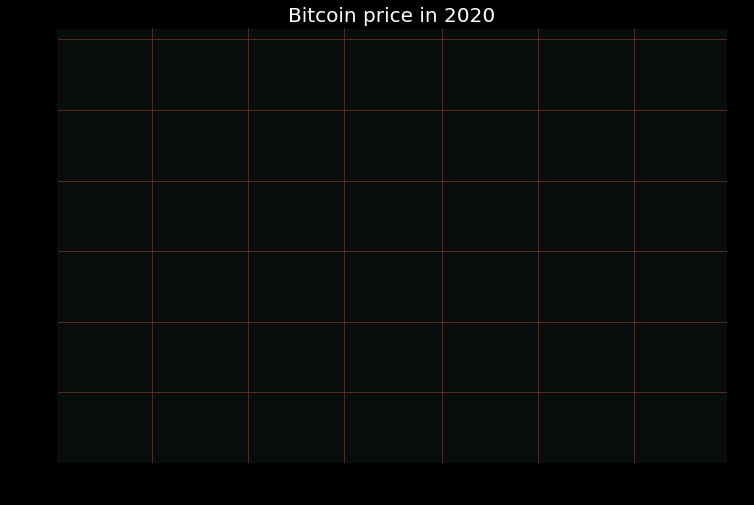

In [ ]:
# Plotgraph
plt.rcParams['figure.facecolor'] = 'black'
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2021, 3, 1)])
ax.set_ylim(np.min(df2.Close), np.max(df2.Close)+5000)
ax.set_xlabel('Month',fontsize = 14,fontname='Arial')
ax.set_ylabel('Price [USD]',fontsize = 14,fontname='Arial')
ax.set_title('Bitcoin price in 2020',fontsize = 20,color='white',fontname='Arial')
ax.xaxis.grid(color='#7f2b0a') 
ax.yaxis.grid(color='#7f2b0a') 
ax.set_facecolor('#070d0d') 
line, = ax.plot([], [], lw=4,color='green')

In [ ]:

# import interesting picture show deploy in this graph
arr_lena = mpimg.imread('/content/drive/MyDrive/bitcoin.png')# import ตามชื่อไฟล์รูปที่โหลดเก็บไว้
imagebox = OffsetImage(arr_lena,zoom=0.5)
ab = AnnotationBbox(imagebox, (datetime.date(2020, 7, 25), 30000), frameon=False)
ax.add_artist(ab)
ax.spines["bottom"].set_color("#7f2b0a") 
ax.spines["top"].set_color("#7f2b0a")
ax.spines["left"].set_color("#7f2b0a")
ax.spines["right"].set_color("#7f2b0a")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='both', colors='white')
plt.draw()
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    d = df2.iloc[:int(i+1)] #select data range
    x = d.Timestamp
    y = d.Close
    line.set_data(x, y)
    return (line,)
# Finally show animation graph
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400,interval=25,  repeat=True)
anim.save('bitcoin2020.mp4', savefig_kwargs={'facecolor':'black'})

<Figure size 432x288 with 0 Axes>